In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'C:\\Users\\Lenovo\\Desktop\\project\\fruit_vegi_classifier\\Fruits_Vegetables\\train'
data_test_path = 'C:\\Users\\Lenovo\\Desktop\\project\\fruit_vegi_classifier\\Fruits_Vegetables\\test'
data_val_path = 'C:\\Users\\Lenovo\\Desktop\\project\\fruit_vegi_classifier\\Fruits_Vegetables\\validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


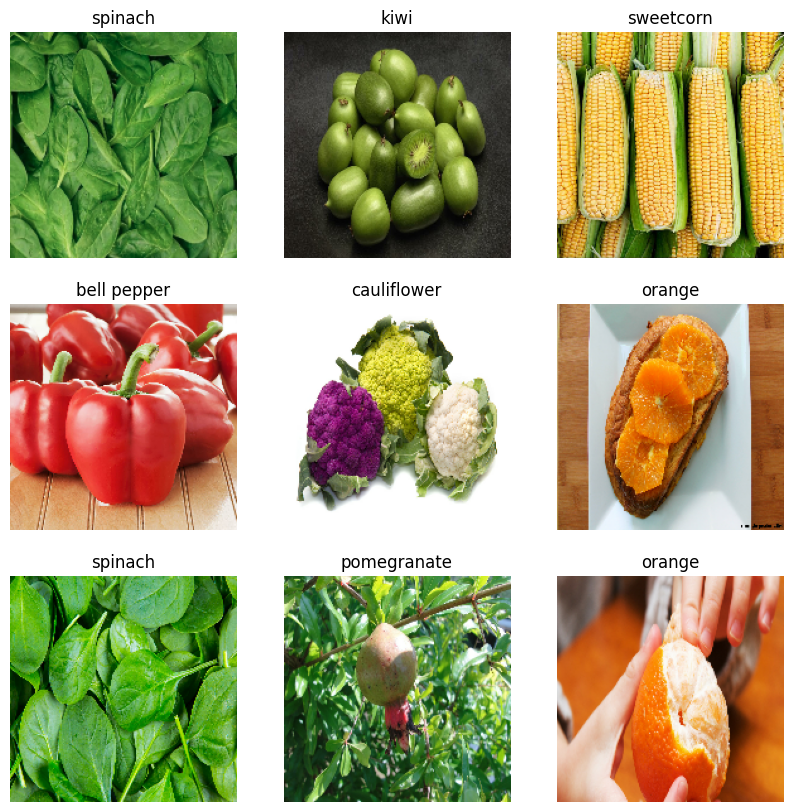

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 206ms/step - accuracy: 0.0973 - loss: 3.3592 - val_accuracy: 0.2735 - val_loss: 2.6139
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.2860 - loss: 2.5040 - val_accuracy: 0.5413 - val_loss: 1.6915
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.4459 - loss: 1.9580 - val_accuracy: 0.7578 - val_loss: 1.0484
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.6125 - loss: 1.3615 - val_accuracy: 0.8091 - val_loss: 0.8032
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.7602 - loss: 0.8096 - val_accuracy: 0.9259 - val_loss: 0.4563
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.8799 - loss: 0.4711 - val_accuracy: 0.9174 - val_loss: 0.4183
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.9262 - loss: 0.2896 - val_accuracy: 0.9459 - val_loss: 0.4267
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.9544 - loss: 0.1981 - val_accu

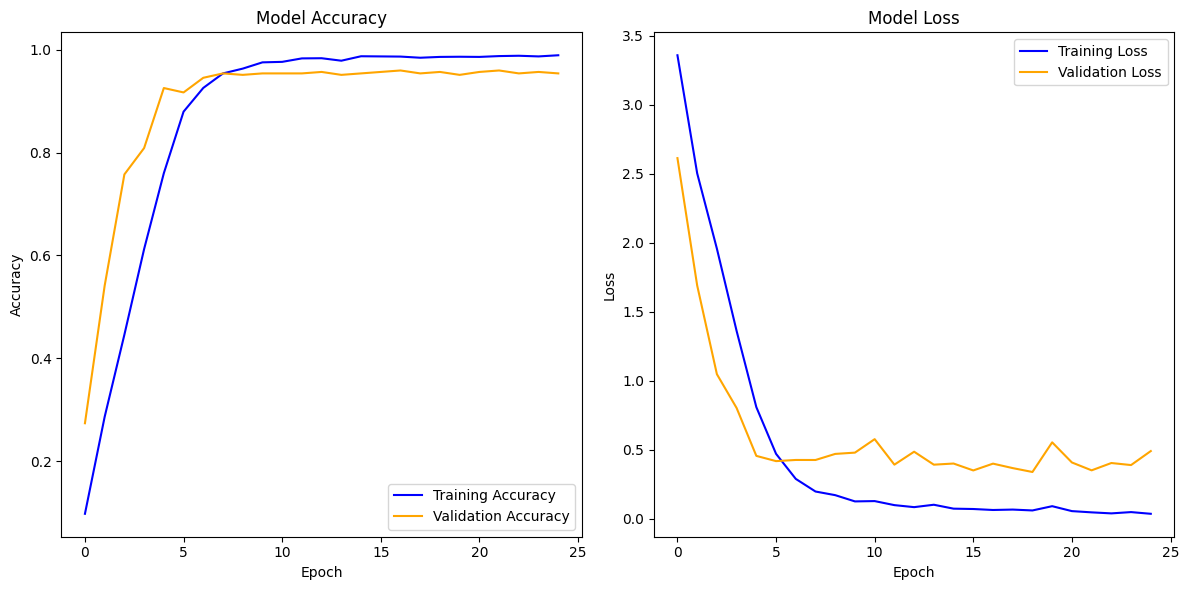

In [16]:
epochs_range = range(epochs_size)
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss', color='blue')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [20]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [21]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [22]:
score = tf.nn.softmax(predict)

In [23]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is apple with accuracy of 99.85


In [24]:
model.save('Fruits_vegetables_classifier.keras')